## Empathy Cues Graphs

In [75]:
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

### Add the Who collumn to the BERT dataset

In [76]:
# Function to count pronouns in a text
def count_pronouns(text, pronouns):
    count = 0
    words = text.split()
    for word in words:
        if word.lower() in pronouns:
            count += 1
    return count

In [77]:


# pronoun groups
pronoun_groups = {0: ['I', 'me', 'my', 'mine', 'myself', 'we', 'us', 'our', 'ourselfs'],
                1: ['you', 'your', 'yours', 'yourself', 'yourselves'],
                2: ['he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'they', 'them', 'their', 'theirs', 'themselves'],
                  }

# Iterate over the BERT dataset and assign the 'who' label
current_dir = os.getcwd()
dataset_path = os.path.join(current_dir, 'results', 'hri_data_cues_revised_label', 'modernbert-large.csv')
bert_dataset = pd.read_csv(dataset_path)

who_labels = []
for text in bert_dataset['text']:
    counts = {group: count_pronouns(text, pronouns) for group, pronouns in pronoun_groups.items()}
    who_label = max(counts, key=counts.get)
    who_labels.append(who_label)

# Add the 'who' column to the BERT dataset
bert_dataset['who'] = who_labels

# Save the updated dataset
bert_dataset.to_csv(os.path.join(current_dir, 'results', 'hri_data_cues_revised_label', 'bert_who.csv'), index=False)

### Load Datasets

In [91]:
dataset_names = ['bert_who.csv', 'Meta-Llama-3.1-70B-Instruct-AWQ-INT4.csv', 'Meta-Llama-3.3-70B-Instruct-AWQ-INT4.csv', 'gpt-4o-mini.csv', 'gpt-4o.csv']

current_dir = os.getcwd()
datasets = []

for dataset_name in dataset_names:
    dataset_path = os.path.join(current_dir, 'results', 'hri_data_cues_revised_label',dataset_name)
    dataset = pd.read_csv(dataset_path)
    datasets.append(dataset)

### Histograms Using Seaborn for HRI

/Users/chris/anaconda3/envs/empathy/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chris/anaconda3/envs/empathy/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chris/anaconda3/envs/empathy/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chris/anaconda3/envs/empathy/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

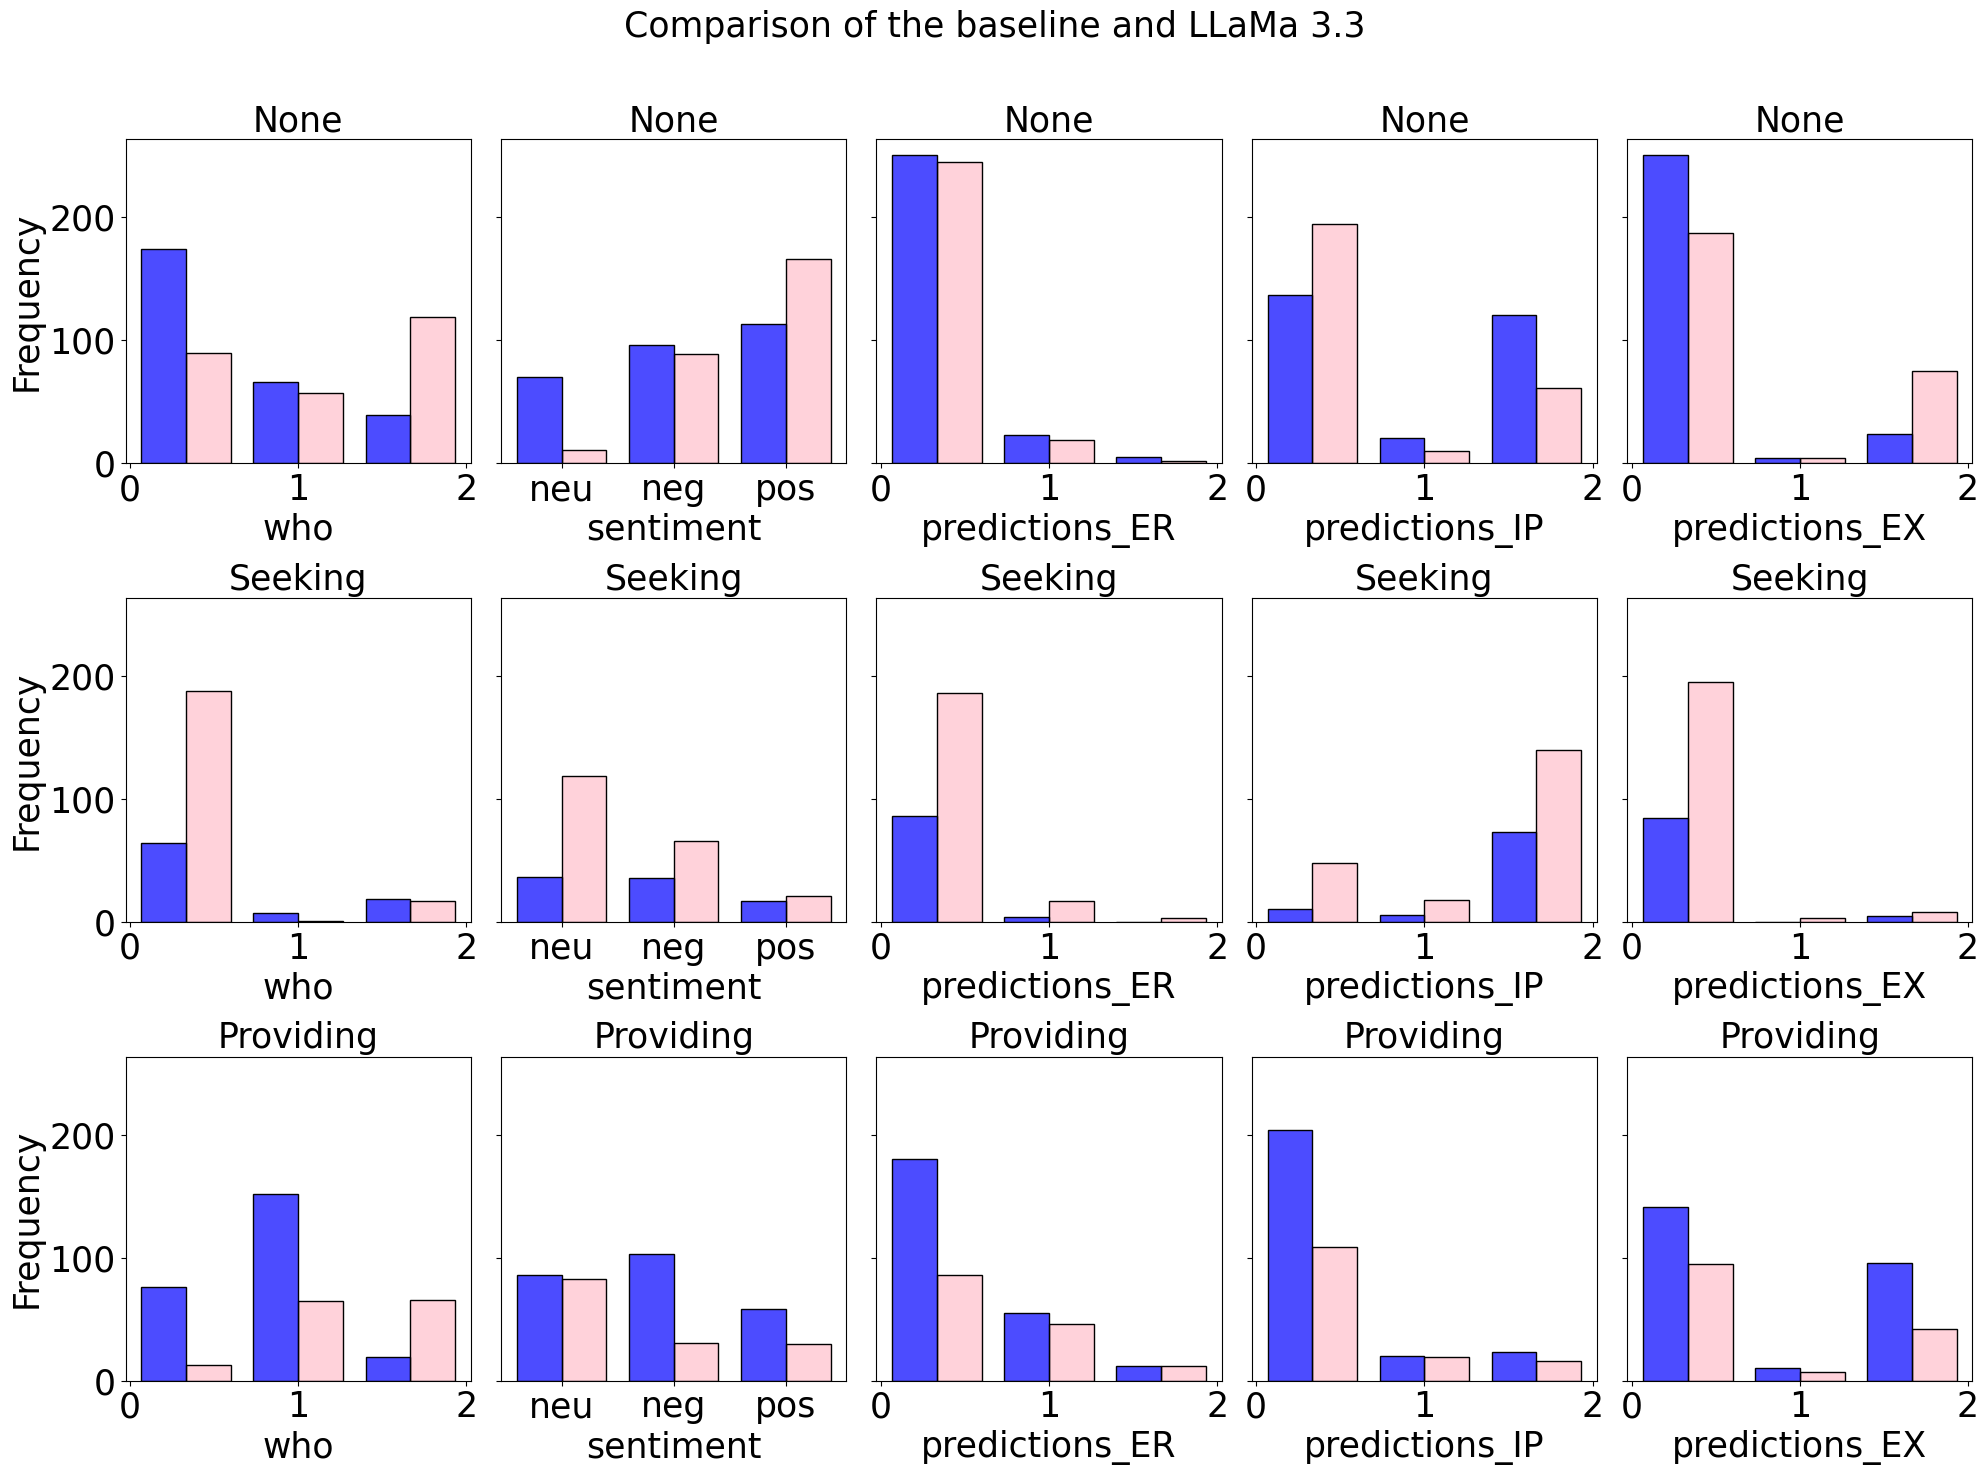

In [79]:
# Relevant columns and their possible values
columns_info = {
    # 'valence': [-1, 1],
    # 'arousal': [-1, 1],
    'who': [0, 1, 2],
    'sentiment': ['neu', 'neg', 'pos'],
    'predictions_ER': [0, 1, 2],
    'predictions_IP': [0, 1, 2],
    'predictions_EX': [0, 1, 2],
}

# Classification labels and their corresponding names
classification_labels = {
    0: 'None',
    1: 'Seeking',
    2: 'Providing'
}

# Set the font size for all text elements
plt.rcParams.update({
    'axes.titlesize': 25,
    'axes.labelsize': 25,
    'xtick.labelsize': 25,
    'ytick.labelsize': 25,
    'legend.fontsize': 20,
    'figure.titlesize': 20
})

# Plot for BERT and LLaMa 3.3
fig, axes = plt.subplots(len(classification_labels), len(columns_info), figsize=(20, 15), sharey=True)
fig.suptitle('Comparison of the baseline and LLaMa 3.3', fontsize=25)

bert_dataset = datasets[0]
llama_dataset = datasets[2]

for row, (label, label_name) in enumerate(classification_labels.items()):
    filtered_bert = bert_dataset[bert_dataset['classification_label'] == label].copy()
    filtered_bert['model'] = 'BERT'
    
    filtered_llama = llama_dataset[llama_dataset['classification_label'] == label].copy()
    filtered_llama['model'] = 'LLaMa 3.3'
    
    combined_data = pd.concat([filtered_bert, filtered_llama])
    
    for col, (column, values) in enumerate(columns_info.items()):
        sns.histplot(
            combined_data,
            x=column,
            bins=len(values),
            hue='model',
            multiple='dodge',
            shrink=0.8,
            kde=False,
            ax=axes[row, col],
            palette={'BERT': 'blue', 'LLaMa 3.3': 'pink'},
            alpha=0.7,
            legend=False 
        )
        axes[row, col].set_title(f'{label_name}')
        axes[row, col].set_xlabel(column)
        axes[row, col].set_ylabel('Frequency')
        axes[row, col].set_xticks(range(len(values)))
        axes[row, col].set_xticklabels(values)



plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Frequency Cues for Non-HRI

In [114]:

# load the data
current_dir = os.getcwd()
dataset_path = os.path.join(current_dir, 'results', 'non_hri_data_test', 'Meta-Llama-3.3-70B-Instruct-AWQ-INT4.csv')
llamma_dataset = pd.read_csv(dataset_path)

# Open a file to save the results
with open('top_3_frequent_non_hri.txt', 'w') as f:
    # Iterate over the datasets and get the top 3 most frequent values

    datasets_3 = [llamma_dataset]
    dataset_names = ['LLaMa 3.3']

    for i, dataset in enumerate(datasets_3):
        f.write(f"Dataset: {dataset_names[i]}\n")
        for label, label_name in classification_labels.items():
            filtered_data = dataset[dataset['classification_label'] == label]
            f.write(f"Classification Label: {label_name}\n")
            for column in columns_info.keys():
                top_3_values, percentages = get_top_3_frequent_values(filtered_data, column)
                f.write(f"Top 3 most frequent values for {column}:\n")
                for value, count, percentage in zip(top_3_values.index, top_3_values.values, percentages.values):
                    f.write(f"{value}: {count} ({percentage:.2f})\n")
            f.write("\n")

### Histogram for Non-HRI

In [115]:
# who for non-HRI data
# pronoun groups
pronoun_groups = {0: ['I', 'me', 'my', 'mine', 'myself', 'we', 'us', 'our', 'ourselfs'],
                1: ['you', 'your', 'yours', 'yourself', 'yourselves'],
                2: ['he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'they', 'them', 'their', 'theirs', 'themselves'],
                  }

# Iterate over the BERT dataset and assign the 'who' label
current_dir = os.getcwd()
dataset_path = os.path.join(current_dir, 'results', 'non_hri_data_test', 'modernbert-large.csv')
bert_dataset = pd.read_csv(dataset_path)

who_labels = []
for text in bert_dataset['text']:
    counts = {group: count_pronouns(text, pronouns) for group, pronouns in pronoun_groups.items()}
    who_label = max(counts, key=counts.get)
    who_labels.append(who_label)

# Add the 'who' column to the BERT dataset
bert_dataset['who'] = who_labels

# Save the updated dataset
bert_dataset.to_csv(os.path.join(current_dir, 'results', 'non_hri_data_test', 'bert_who-large.csv'), index=False)

/Users/chris/anaconda3/envs/empathy/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chris/anaconda3/envs/empathy/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chris/anaconda3/envs/empathy/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chris/anaconda3/envs/empathy/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

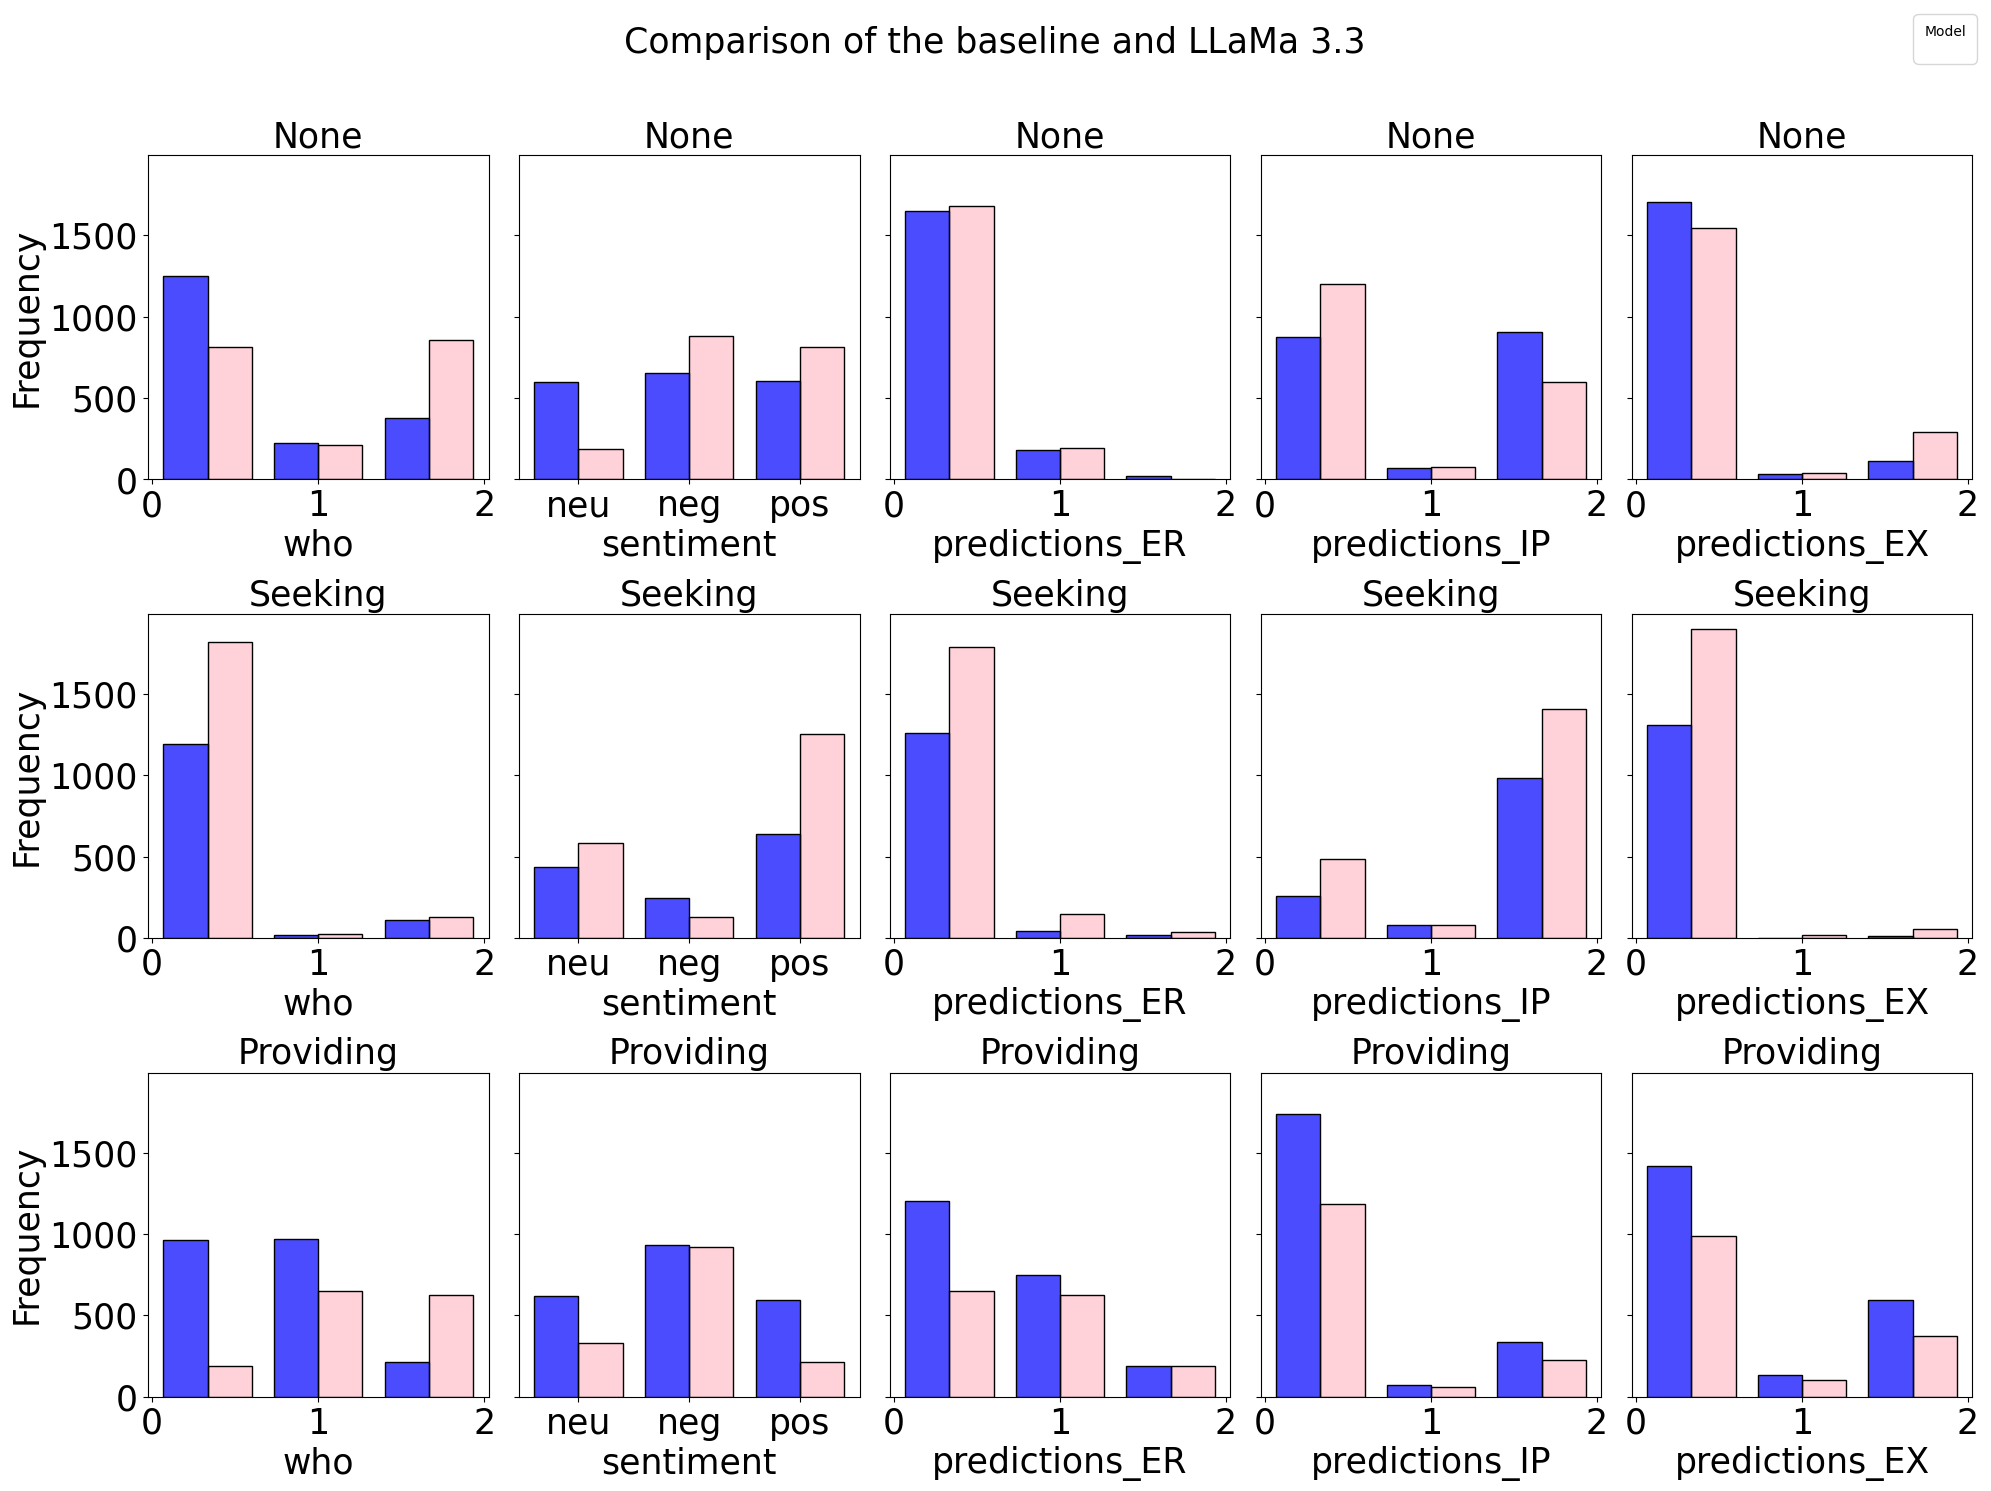

In [121]:

# load the data
dataset_names_noHRI = ['bert_who-large.csv', 'Meta-Llama-3.3-70B-Instruct-AWQ-INT4.csv']

current_dir = os.getcwd()
datasets_noHRI = []

for dataset_name in dataset_names_noHRI:
    dataset_path = os.path.join(current_dir, 'results', 'non_hri_data_test',dataset_name)
    dataset = pd.read_csv(dataset_path)
    datasets_noHRI.append(dataset)


# Relevant columns and their possible values
columns_info = {
    # 'valence': [-1, 1],
    # 'arousal': [-1, 1],
    'who': [0, 1, 2],
    'sentiment': ['neu', 'neg', 'pos'],
    'predictions_ER': [0, 1, 2],
    'predictions_IP': [0, 1, 2],
    'predictions_EX': [0, 1, 2],
}

# Classification labels and their corresponding names
classification_labels = {
    0: 'None',
    1: 'Seeking',
    2: 'Providing'
}

# Set the font size for all text elements
plt.rcParams.update({
    'axes.titlesize': 25,
    'axes.labelsize': 25,
    'xtick.labelsize': 25,
    'ytick.labelsize': 25,
    'legend.fontsize': 20,
    'figure.titlesize': 20
})

# Plot for BERT and LLaMa 3.3
fig, axes = plt.subplots(len(classification_labels), len(columns_info), figsize=(20, 15), sharey=True)
fig.suptitle('Comparison of the baseline and LLaMa 3.3', fontsize=25)

bert_dataset = datasets_noHRI[0]
llama_dataset = datasets_noHRI[1]

for row, (label, label_name) in enumerate(classification_labels.items()):
    filtered_bert = bert_dataset[bert_dataset['classification_label'] == label].copy()
    filtered_bert['model'] = 'BERT'
    
    filtered_llama = llama_dataset[llama_dataset['classification_label'] == label].copy()
    filtered_llama['model'] = 'LLaMa 3.3'

    # Ensure no duplicate labels and reset index
    filtered_bert = filtered_bert.drop_duplicates().reset_index(drop=True)
    filtered_llama = filtered_llama.drop_duplicates().reset_index(drop=True)
    
    combined_data = pd.concat([filtered_bert, filtered_llama]).reset_index(drop=True)
    
    for col, (column, values) in enumerate(columns_info.items()):
        sns.histplot(
            combined_data,
            x=column,
            bins=len(values),
            hue='model',
            multiple='dodge',
            shrink=0.8,
            kde=False,
            ax=axes[row, col],
            palette={'BERT': 'blue', 'LLaMa 3.3': 'pink'},
            alpha=0.7,
            legend=False 
        )
        axes[row, col].set_title(f'{label_name}')
        axes[row, col].set_xlabel(column)
        axes[row, col].set_ylabel('Frequency')
        axes[row, col].set_xticks(range(len(values)))
        axes[row, col].set_xticklabels(values)

# Add a single legend for the entire figure
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', title='Model')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Arousal and Valence Values Non-HRI vs HRI with LLaMA 3.3

In [124]:
def calculate_stats(df, label):
    filtered_data = df[df['classification_label'] == label]
    valence_mean = filtered_data['valence'].mean()
    valence_std = filtered_data['valence'].std()
    arousal_mean = filtered_data['arousal'].mean()
    arousal_std = filtered_data['arousal'].std()
    return valence_mean, valence_std, arousal_mean, arousal_std


In [125]:
# Calculate statistics for each classification label
stats = {}

for dataset, name in zip([datasets_noHRI[1], datasets[2]], ['Non-HRI', 'HRI']):
    stats[name] = {}
    for label, label_name in classification_labels.items():
        valence_mean, valence_std, arousal_mean, arousal_std = calculate_stats(dataset, label)
        stats[name][label_name] = {
            'valence_mean': valence_mean,
            'valence_std': valence_std,
            'arousal_mean': arousal_mean,
            'arousal_std': arousal_std
        }

# Print the statistics
for model, model_stats in stats.items():
    print(f"Model: {model}")
    for label_name, label_stats in model_stats.items():
        print(f"  Classification Label: {label_name}")
        print(f"    Valence Mean: {label_stats['valence_mean']:.2f}, Valence Std: {label_stats['valence_std']:.2f}")
        print(f"    Arousal Mean: {label_stats['arousal_mean']:.2f}, Arousal Std: {label_stats['arousal_std']:.2f}")

Model: Non-HRI
  Classification Label: None
    Valence Mean: 0.40, Valence Std: 0.38
    Arousal Mean: 0.16, Arousal Std: 0.21
  Classification Label: Seeking
    Valence Mean: 0.71, Valence Std: 0.33
    Arousal Mean: 0.52, Arousal Std: 0.21
  Classification Label: Providing
    Valence Mean: 0.59, Valence Std: 0.34
    Arousal Mean: 0.37, Arousal Std: 0.19
Model: HRI
  Classification Label: None
    Valence Mean: 0.28, Valence Std: 0.37
    Arousal Mean: 0.11, Arousal Std: 0.18
  Classification Label: Seeking
    Valence Mean: 0.65, Valence Std: 0.36
    Arousal Mean: 0.50, Arousal Std: 0.22
  Classification Label: Providing
    Valence Mean: 0.49, Valence Std: 0.31
    Arousal Mean: 0.30, Arousal Std: 0.20


### Frequency of Cue Values for HRI

In [ ]:
def get_top_3_frequent_values(df, column):
    value_counts = df[column].value_counts()
    total_rows = len(df)
    top_3 = value_counts.nlargest(3)
    proportions = top_3 / total_rows
    return top_3, proportions

In [ ]:
# Open a file to save the results
with open('top_3_frequent_values.txt', 'w') as f:
    # Iterate over the datasets and get the top 3 most frequent values

    datasets_2 = [datasets[0], datasets[2]]
    dataset_names = ['BERT', 'LLaMa 3.3']

    for i, dataset in enumerate(datasets_2):
        f.write(f"Dataset: {dataset_names[i]}\n")
        for label, label_name in classification_labels.items():
            filtered_data = dataset[dataset['classification_label'] == label]
            f.write(f"Classification Label: {label_name}\n")
            for column in columns_info.keys():
                top_3_values, percentages = get_top_3_frequent_values(filtered_data, column)
                f.write(f"Top 3 most frequent values for {column}:\n")
                for value, count, percentage in zip(top_3_values.index, top_3_values.values, percentages.values):
                    f.write(f"{value}: {count} ({percentage:.2f})\n")
            f.write("\n")

### Empathetic Text Cues Comparison Graph

/Users/chris/anaconda3/envs/empathy/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chris/anaconda3/envs/empathy/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chris/anaconda3/envs/empathy/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chris/anaconda3/envs/empathy/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

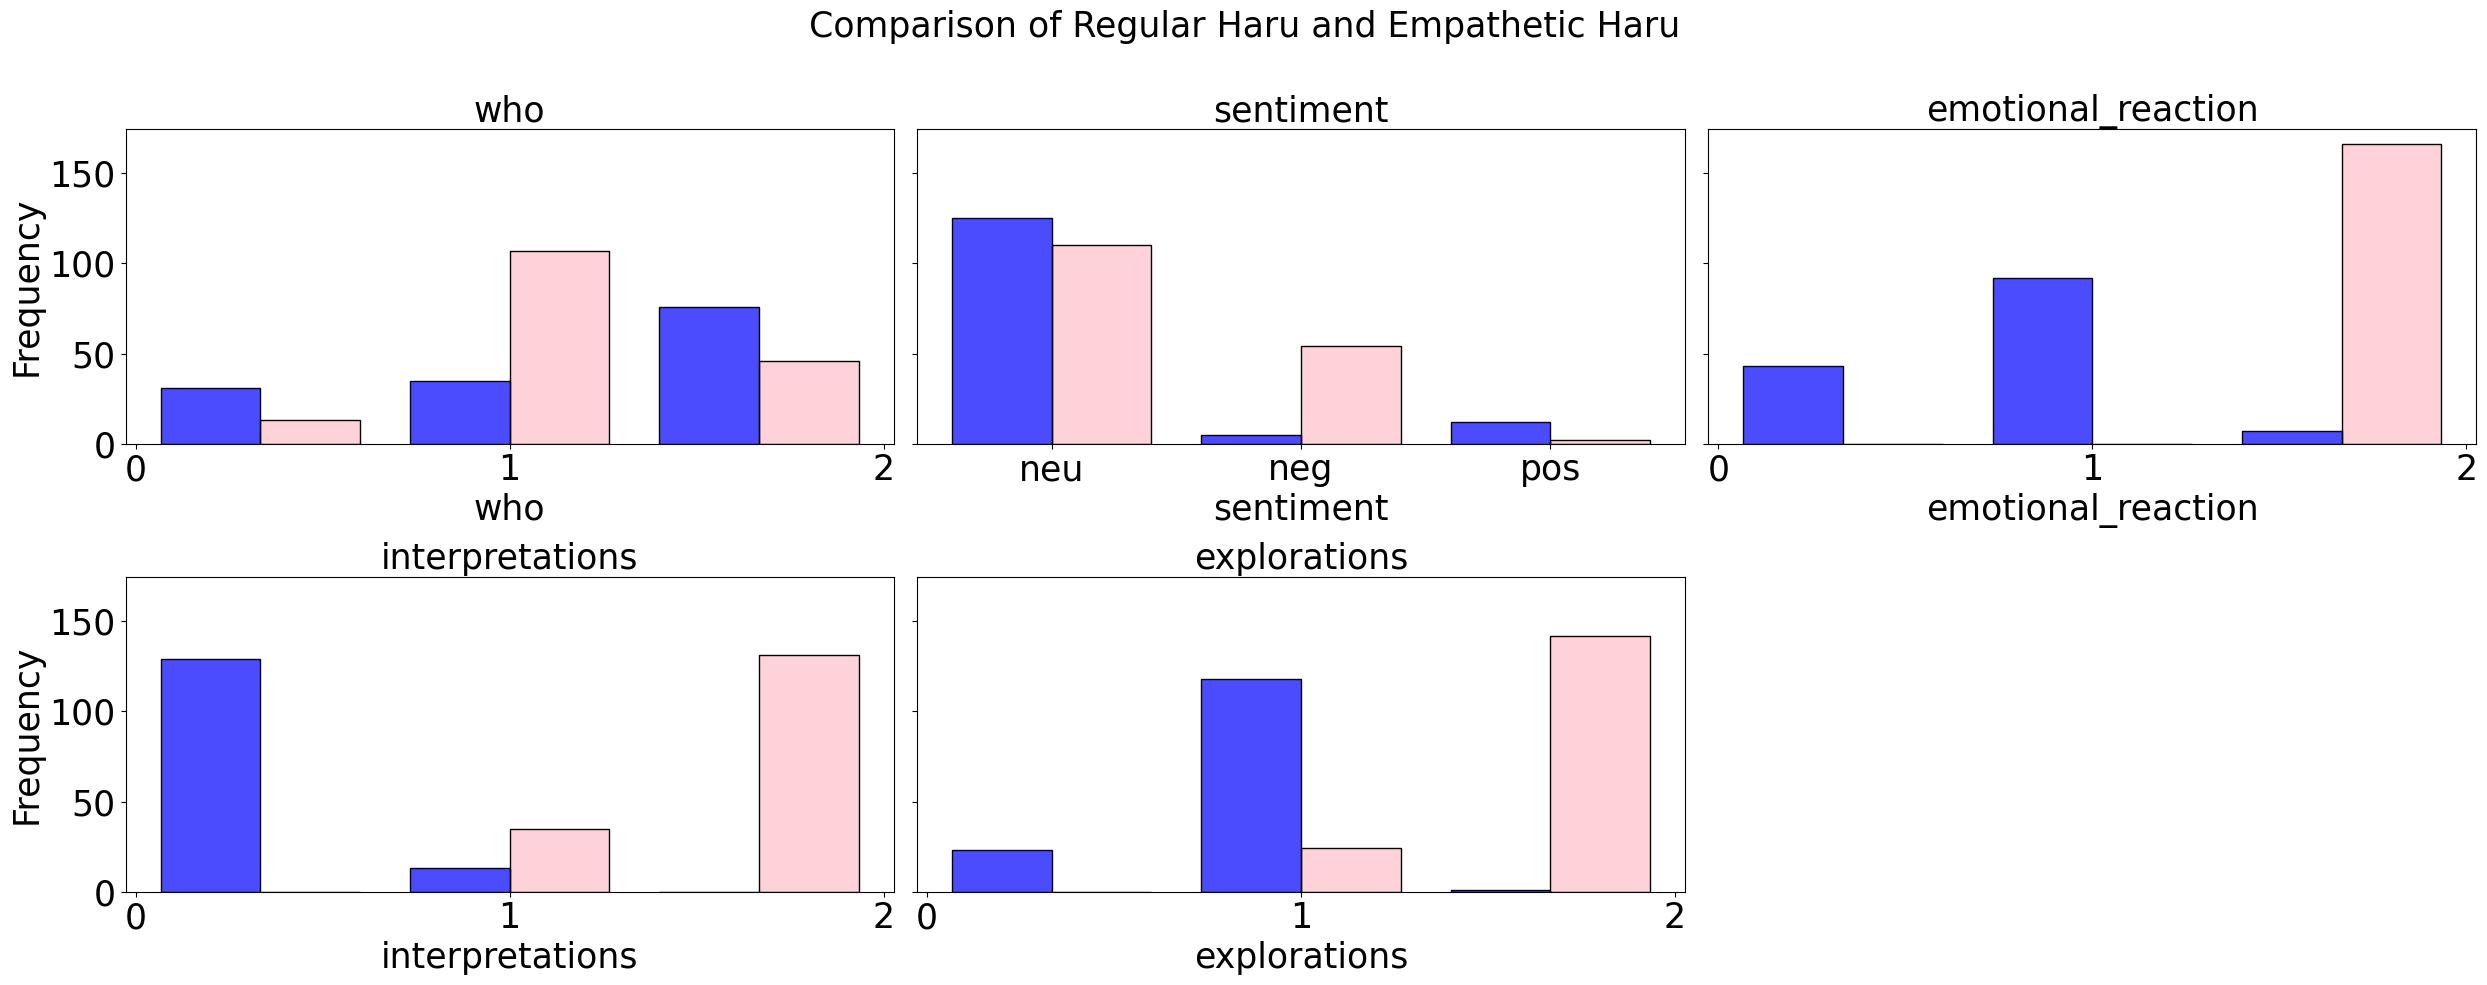

In [139]:
# instruction
# results/ EERobot/ Meta-Llama-3.3-70B-Instruct-AWQ-INT4_generate_classify.csv
# results / TSC / Meta-Llama-3.3-70B-Instruct-AWQ-INT4_generate_classify.csv

current_dir = os.getcwd()
dataset_path_tsc = os.path.join(current_dir, 'results', 'TSC', 'Meta-Llama-3.3-70B-Instruct-AWQ-INT4_generate_classify.csv')
dataset_path_eerobot = os.path.join(current_dir, 'results', 'EERobot', 'Meta-Llama-3.3-70B-Instruct-AWQ-INT4_generate_classify.csv')
dataset_tsc = pd.read_csv(dataset_path_tsc)
dataset_eerobot = pd.read_csv(dataset_path_eerobot)

# concatenate the two datasets
combined_dataset = pd.concat([dataset_tsc, dataset_eerobot])

# separete samples based on the  "instruction" column
regular_haru_dataset = combined_dataset[combined_dataset['instruction'].isnull()]
empathetic_haru_dataset = combined_dataset[combined_dataset['instruction'].notnull()]

columns_info = {
    'who': [0, 1, 2],
    'sentiment': ['neu', 'neg', 'pos'],
    'emotional_reaction': [0, 1, 2],
    'interpretations': [0, 1, 2],
    'explorations': [0, 1, 2],
}



# Set the font size for all text elements
plt.rcParams.update({
    'axes.titlesize': 25,
    'axes.labelsize': 25,
    'xtick.labelsize': 25,
    'ytick.labelsize': 25,
    'legend.fontsize': 20,
    'figure.titlesize': 20
})


# Plot for regular_haru and empathetic_haru
fig, axes = plt.subplots(2, 3, figsize=(25, 10), sharey=True)
fig.suptitle('Comparison of Regular Haru and Empathetic Haru', fontsize=25)

# Flatten the axes array for easy iteration
axes = axes.flatten()

for col, (column, values) in enumerate(columns_info.items()):
    filtered_regular_haru = regular_haru_dataset.copy()
    filtered_regular_haru['model'] = 'Regular Haru'
    
    filtered_empathetic_haru = empathetic_haru_dataset.copy()
    filtered_empathetic_haru['model'] = 'Empathetic Haru'

    # Ensure no duplicate labels and reset index
    filtered_regular_haru = filtered_regular_haru.drop_duplicates().reset_index(drop=True)
    filtered_empathetic_haru = filtered_empathetic_haru.drop_duplicates().reset_index(drop=True)
    
    combined_data = pd.concat([filtered_regular_haru, filtered_empathetic_haru]).reset_index(drop=True)
    
    sns.histplot(
        combined_data,
        x=column,
        bins=len(values),
        hue='model',
        multiple='dodge',
        shrink=0.8,
        kde=False,
        ax=axes[col],
        palette={'Regular Haru': 'blue', 'Empathetic Haru': 'pink'},
        alpha=0.7,
        legend=False 
    )
    axes[col].set_title(column)
    axes[col].set_xlabel(column)
    axes[col].set_ylabel('Frequency')
    axes[col].set_xticks(range(len(values)))
    axes[col].set_xticklabels(values)



# Hide the last subplot if there are fewer columns than subplots
if len(columns_info) < len(axes):
    for i in range(len(columns_info), len(axes)):
        fig.delaxes(axes[i])


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



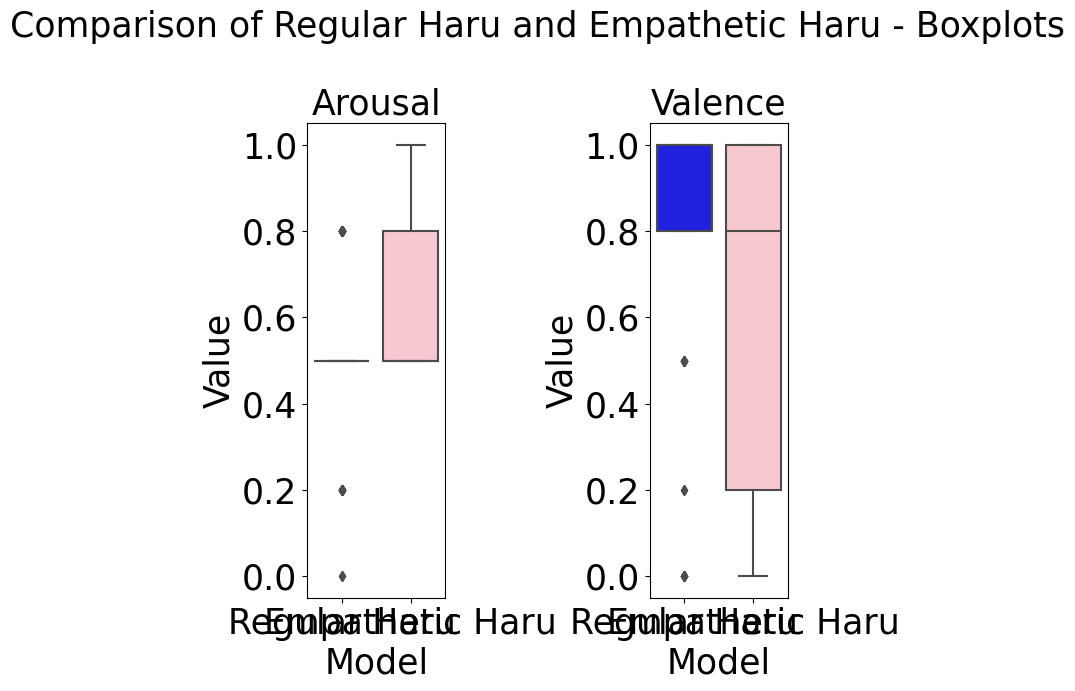

In [150]:

# Plot boxplots for arousal and valence
fig, axes = plt.subplots(1, 2, figsize=(7, 7))
fig.suptitle('Comparison of Regular Haru and Empathetic Haru - Boxplots', fontsize=25)

filtered_regular_haru = regular_haru_dataset.copy()
filtered_regular_haru['model'] = 'Regular Haru'

filtered_empathetic_haru = empathetic_haru_dataset.copy()
filtered_empathetic_haru['model'] = 'Empathetic Haru'

combined_data = pd.concat([filtered_regular_haru, filtered_empathetic_haru]).reset_index(drop=True)

palette=palette={'Regular Haru': 'blue', 'Empathetic Haru': 'pink'}

sns.boxplot(
    data=combined_data,
    x='model',
    y='arousal',
    ax=axes[0],
    palette=palette
)
axes[0].set_title('Arousal')  # Set the title to "Arousal"
axes[0].set_xlabel('Model')  # Set the x-axis label to "Model"
axes[0].set_ylabel('Value')  # Set the y-axis label to "Value"

sns.boxplot(
    data=combined_data,
    x='model',
    y='valence',
    ax=axes[1],
    palette=palette
)
axes[1].set_title('Valence')  # Set the title to "Valence"
axes[1].set_xlabel('Model')  # Set the x-axis label to "Model"
axes[1].set_ylabel('Value')  # Set the y-axis label to "Value"

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()